# **Comparison of Covid19 trend in Italy and Sweden**

We first compare the 15-day trend of cases in Italy and Sweden since the day they reached 1000 (March 3 for Italy, March 15 for Sweden). 

Since mid March, Sweden only tests:

*   Hospitalized patients from risk groups (elderly, immunocompromised, etc.)
*   Healthcare personnel with symptoms

so the active cases for Sweden [1] have been compared to the numbers of hospitalized patients in Italy [2]. The active cases for Sweden are calculated as: total cases - deaths - recoveries.

The graphs also show intensive care unit cases for the same time period (March 3 - March 17 for Italy, March 15 - March 29 for Sweden).

[1] [C19.SE - Coronavirus i Sverige](https://c19.se/)

[2] [Il Sole 24 Ore - Coronavirus in Italia](https://lab24.ilsole24ore.com/coronavirus/)



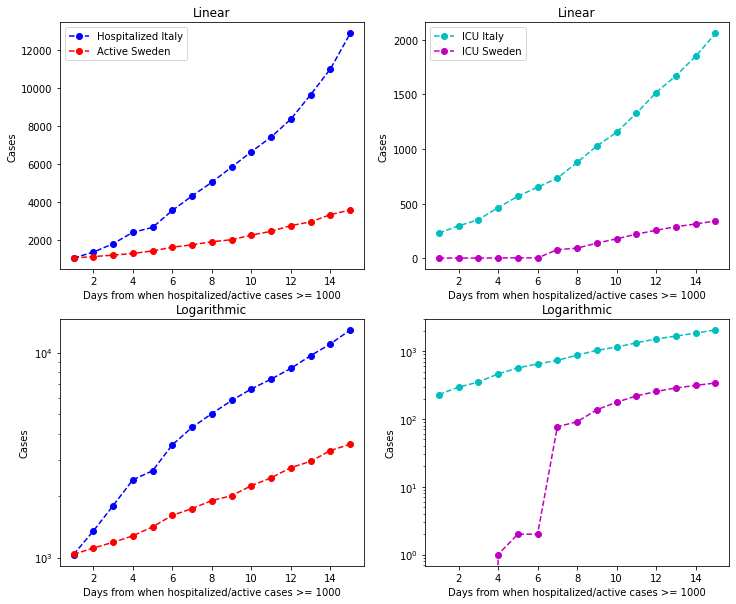

In [11]:
import numpy as np
import matplotlib.pyplot as plt

italy_hospitalized = [1034, 1346, 1790, 2394, 2651, 3550, 4316,
                     5038, 5838, 6650, 7426, 8372, 9663, 11025, 
                     12894]

sweden_active = [1036, 1113, 1187, 1276, 1412, 1607, 1734,
                1897, 2003, 2243, 2448, 2747, 2948, 3326, 
                3574]

italy_icu = [229, 295, 351, 462, 567, 
             650, 733, 877, 1028, 1153, 
             1328, 1518, 1672, 1851, 2060]

sweden_icu = [0, 0, 0, 1, 2, 2,
              77, 91, 137, 177, 
              219, 255, 287, 313, 
              340]

x = np.arange(1, 16)

fig = plt.figure()
ax1 = fig.add_subplot(221)
ax1.plot(x, italy_hospitalized, '--bo', label='Hospitalized Italy')
ax1.plot(x, sweden_active, '--ro', label='Active Sweden')
ax1.legend(loc="upper left")
ax1.set_title('Linear')
ax1.set_xlabel('Days from when hospitalized/active cases >= 1000')
ax1.set_ylabel('Cases')

ax2 = fig.add_subplot(223)
ax2.plot(x, italy_hospitalized, '--bo')
ax2.plot(x, sweden_active, '--ro')
ax2.set_title('Logarithmic')
ax2.set_xlabel('Days from when hospitalized/active cases >= 1000')
ax2.set_ylabel('Cases')
ax2.set_yscale('log')

ax3 = fig.add_subplot(222)
ax3.plot(x, italy_icu, '--co', label='ICU Italy')
ax3.plot(x, sweden_icu, '--mo', label='ICU Sweden')
ax3.legend(loc="upper left")
ax3.set_title('Linear')
ax3.set_xlabel('Days from when hospitalized/active cases >= 1000')
ax3.set_ylabel('Cases')

ax4 = fig.add_subplot(224)
ax4.plot(x, italy_icu, '--co')
ax4.plot(x, sweden_icu, '--mo')
ax4.set_title('Logarithmic')
ax4.set_xlabel('Days from when hospitalized/active cases >= 1000')
ax4.set_ylabel('Cases')
ax4.set_yscale('log')

fig.set_figheight(10)
fig.set_figwidth(12)
plt.show()

We then compare the same data for the two countries from March 2nd (the first day reported for Sweden) until today:

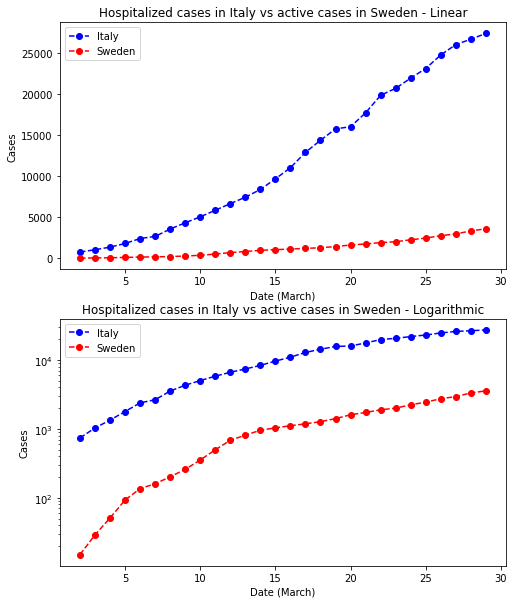

In [12]:
import numpy as np
import matplotlib.pyplot as plt

italy_hospitalized = [742, 1034, 1346, 1790, 2394, 2651, 3550, 4316,
                     5038, 5838, 6650, 7426, 8372, 9663, 11025,
                     12894, 14363, 15757, 16020, 17708, 19846, 
                     20692, 21937, 23112, 24753, 26029, 26676, 
                     27386]

sweden_active = [15, 29, 51, 93, 136, 160, 202, 259, 354, 498, 685,
                812, 958, 1036, 1113, 1187, 1276, 1412, 1607, 1734,
                1897, 2003, 2243, 2448, 2747, 2948, 3326, 
                3574]

x = np.arange(2, 30)

fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.plot(x, italy_hospitalized, '--bo', label='Italy')
ax1.plot(x, sweden_active, '--ro', label='Sweden')
ax1.legend(loc="upper left")
ax1.set_title('Hospitalized cases in Italy vs active cases in Sweden - Linear')
ax1.set_xlabel('Date (March)')
ax1.set_ylabel('Cases')

ax2 = fig.add_subplot(212)
ax2.plot(x, italy_hospitalized, '--bo', label='Italy')
ax2.plot(x, sweden_active, '--ro', label='Sweden')
ax2.legend(loc="upper left")
ax2.set_title('Hospitalized cases in Italy vs active cases in Sweden - Logarithmic')
ax2.set_xlabel('Date (March)')
ax2.set_ylabel('Cases')
ax2.set_yscale('log')

fig.set_figheight(10)
fig.set_figwidth(8)
plt.show()

We then compare the swedish trend to the trend of hospitalized cases in Lombardy (10 million inhabitants), Emilia-Romagna (4.4 million inhabitants) and Veneto (4.9 million inhabitants), respectively the 1st, 2nd and 3rd region for number of cases.

The cases start from March 8, first day of Italy reporting hospitalized cases by region. This is in the attempt to distinguish italian trends from the trend of Lombardy, which is particularly severe. 

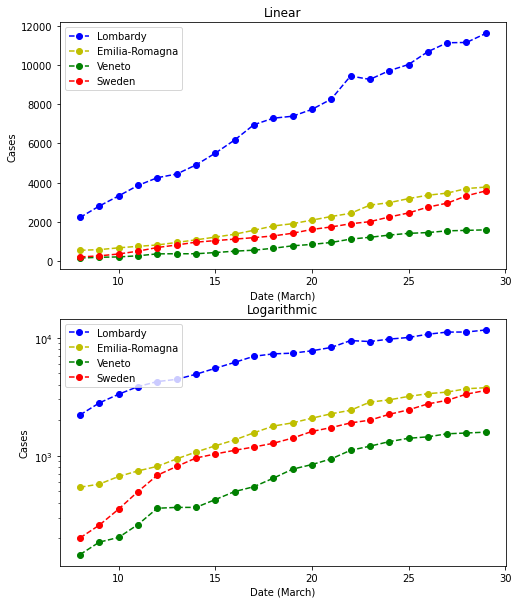

In [18]:
import numpy as np
import matplotlib.pyplot as plt

lom_hos = [2217, 2802, 3319, 3852, 4247, 4435, 
           4898, 5500, 6171, 6953, 7285, 7387,
           7735, 8258, 9439, 9266, 9711, 10026, 
           10681, 11137, 11152, 11613]

er_hos = [542, 576, 669, 745, 814, 942, 1076, 
          1215, 1362, 1566, 1784, 1900, 2083, 2267, 
          2429, 2846, 2974, 3180, 3354, 3461, 3695, 
          3769]

ve_hos = [146, 186, 204, 262, 360, 366, 366, 
          426, 498, 548, 646, 771, 843, 942, 1113,
          1206, 1318, 1407, 1447, 1536, 1559, 1586]

sweden_active = [202, 259, 354, 498, 685, 812, 958, 1036, 
                 1113, 1187, 1276, 1412, 1607, 1734, 1897, 
                 2003, 2243, 2448, 2747, 2948, 3326, 3574]

x = np.arange(8, 30)

fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.plot(x, lom_hos, '--bo', label='Lombardy')
ax1.plot(x, er_hos, '--yo', label='Emilia-Romagna')
ax1.plot(x, ve_hos, '--go', label='Veneto')
ax1.plot(x, sweden_active, '--ro', label='Sweden')
ax1.legend(loc="upper left")
ax1.set_title('Linear')
ax1.set_xlabel('Date (March)')
ax1.set_ylabel('Cases')

ax2 = fig.add_subplot(212)
ax2.plot(x, lom_hos, '--bo', label='Lombardy')
ax2.plot(x, er_hos, '--yo', label='Emilia-Romagna')
ax2.plot(x, ve_hos, '--go', label='Veneto')
ax2.plot(x, sweden_active, '--ro', label='Sweden')
ax2.legend(loc="upper left")
ax2.set_title('Logarithmic')
ax2.set_xlabel('Date (March)')
ax2.set_ylabel('Cases')
ax2.set_yscale('log')

fig.set_figheight(10)
fig.set_figwidth(8)
plt.show()